# Fake News Detection

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string 


In [2]:
df = pd.read_csv("news.csv")

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.shape

(6335, 4)

In [5]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
labels = df.label

In [7]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [8]:
x_train, x_test, y_train, y_test = train_test_split(df["text"], labels, test_size = 0.2,random_state = 20)

In [9]:
x_train.head()

4741    NAIROBI, Kenya — President Obama spoke out Sun...
2089    Killing Obama administration rules, dismantlin...
4074    Dean Obeidallah, a former attorney, is the hos...
5376      WashingtonsBlog \nCNN’s Jake Tapper hit the ...
6028    Some of the biggest issues facing America this...
Name: text, dtype: object

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer   
from sklearn.linear_model import PassiveAggressiveClassifier

In [11]:
# initilise a Tfidvectorizer
vector = TfidfVectorizer(stop_words='english',max_df=0.7)

In [12]:
# fit and transform 
tf_train = vector.fit_transform(x_train)
tf_test = vector.transform(x_test)

In [13]:
# initilise a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=40)
pac.fit(tf_train, y_train)

PassiveAggressiveClassifier(max_iter=40)

In [14]:
# prediction the tst dataset
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = pac.predict(tf_test)

In [15]:
score = accuracy_score(y_test, y_pred)

In [16]:
print(f"Accuracy : {round(score*100,2)}%")

Accuracy : 95.03%


In [20]:
# confusion metrics
confusion_matrix(y_test, y_pred, labels= ['FAKE','REAL'])

array([[626,  22],
       [ 41, 578]], dtype=int64)

<Axes: >

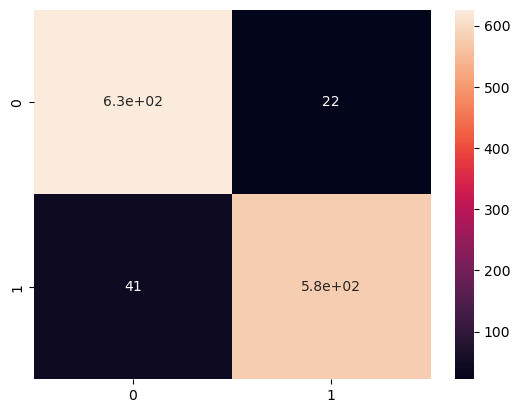

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred, labels= ['FAKE','REAL']),annot = True)

In [18]:
# save model 
import pickle 
filename = 'filealized_model.pkl'
pickle.dump(pac, open(filename, 'wb'))
